In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'desktop\titanic_dataset.csv')

In [3]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Make ‘PassengerId’ as the index column

In [4]:
data=pd.read_csv(r'desktop\titanic_dataset.csv',index_col='PassengerId')
data.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
#one hot encoding

In [6]:
data['Sex']=  pd.get_dummies(data['Sex'])

In [7]:
data.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S


# Check the basic details of the dataset

In [8]:
data.shape

(891, 11)

In [9]:
#The dataset has 891 rows and 11 columns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    uint8  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4), uint8(1)
memory usage: 77.4+ KB


In [11]:
data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891.000000,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Kelly, Miss. Mary",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,0.352413,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,0.477990,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,0.000000,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,0.000000,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,1.000000,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
#age has 177 missing value and cabin has 687 missing value,embaraked are 2

<AxesSubplot:>

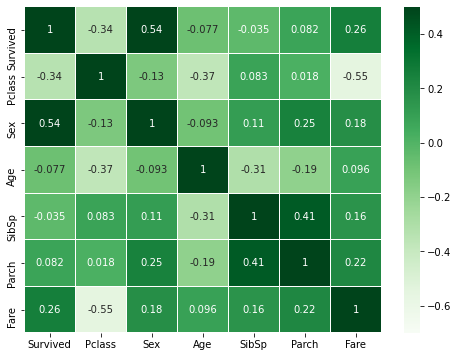

In [14]:
corr=data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,vmin=-0.7,vmax=0.5,linewidth=0.02,cmap='Greens',annot=True)

# Missing value

In [15]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# we can replace missing value in 'age' with it mean
data['Age']=data['Age'].fillna(data['Age'].mean())

In [17]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
# we have check whether cabin value are missing at random


In [19]:
data.groupby(data['Cabin'].isnull()).mean()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Cabin,,,,,,,
False,0.666667,1.196078,0.475490,35.258349,0.441176,0.436275,76.141504
True,0.299854,2.639010,0.315866,28.048341,0.547307,0.365357,19.157325


In [20]:
# survived influance in cabin value

In [21]:
data['Cabin_ind']=np.where(data['Cabin'].isnull(), 0,1)

In [22]:
data.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1


In [23]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Cabin_ind'],
      dtype='object')

In [24]:
#catagarical variable: name,ticket,cabine,embracled can be dropit 
#they are unique values

In [25]:
data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'],axis=1,inplace=True)

In [26]:
data.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind
PassengerId,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,0
2,1,1,1,38.000000,1,0,71.2833,1
3,1,3,1,26.000000,0,0,7.9250,0
4,1,1,1,35.000000,1,0,53.1000,1
5,0,3,0,35.000000,0,0,8.0500,0
6,0,3,0,29.699118,0,0,8.4583,0
7,0,1,0,54.000000,0,0,51.8625,1


In [27]:
data.shape

(891, 8)

In [28]:
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Cabin_ind    0
dtype: int64

In [29]:
# no more missing value in the data set we can next to check for outlier

# outlier

In [30]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1


Text(0.5, 1.0, 'box plot of age')

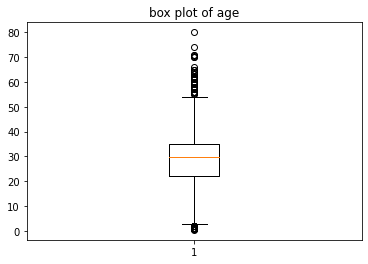

In [31]:
plt.boxplot(data['Age'])
plt.title('box plot of age')

In [32]:
#here we can seen in outlier in this column(age)
# in outlier aviod use by inter quartile range

In [33]:
Q1 =np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 =np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 =np.percentile(data['Age'], 75, interpolation='midpoint')

In [34]:
print(Q1)
print(Q2)
print(Q3)

22.0
29.69911764705882
35.0


In [35]:
#we can find out inter quartile range that is IQR 

In [36]:
IQR=Q3-Q1
IQR

13.0

In [37]:
#we can find out inter quartile range that is IQR 

In [38]:
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

In [39]:
print(low_lim)
print(upp_lim)

2.5
54.5


In [40]:
#here outliyer was lees than2.5 and greater than 54.5


In [41]:
outlier_1=data['Age']<low_lim

In [42]:
outlier_2=data['Age']>upp_lim

In [43]:
#index of outliyer1

In [44]:
data.loc[outlier_1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [45]:
#index of outlier2

In [46]:
data.loc[outlier_2].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [47]:
#we now drop the outlier

In [48]:
data.drop([ 8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832,
         12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [49]:
data.shape

(825, 8)

In [50]:
#the number of row drop 891 to 825

Outlier:Fare

Text(0.5, 1.0, 'box plot of Fare')

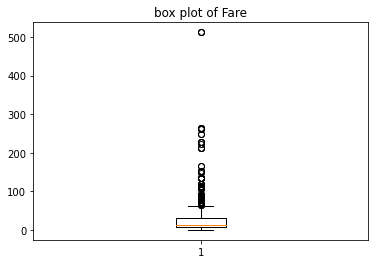

In [51]:
plt.boxplot(data['Fare'])
plt.title('box plot of Fare')

In [52]:
Q1 =np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 =np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 =np.percentile(data['Fare'], 75, interpolation='midpoint')
IQR=Q3-Q1
IQR

22.174999999999997

In [53]:
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-25.366699999999994
63.333299999999994


In [54]:
#here negative not taken

In [55]:
outlier_2=data['Fare']>upp_lim
index=data.loc[outlier_2].index

In [56]:
index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [57]:
len(index)

107

In [58]:
data.drop(index,inplace=True)

In [59]:
data.shape

(718, 8)

In [60]:
#the number of row drop 825 to 718

Outlier:pclass

In [61]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind
PassengerId,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,0
3,1,3,1,26.000000,0,0,7.9250,0
4,1,1,1,35.000000,1,0,53.1000,1
5,0,3,0,35.000000,0,0,8.0500,0
6,0,3,0,29.699118,0,0,8.4583,0


Text(0.5, 1.0, 'box plot of pclass')

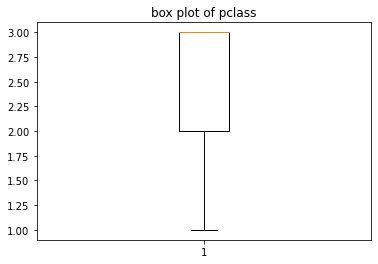

In [63]:
plt.boxplot(data['Pclass'])
plt.title('box plot of pclass')

In [71]:
#no outlier

outlier:SibSp

Text(0.5, 1.0, 'box plot of SibSp')

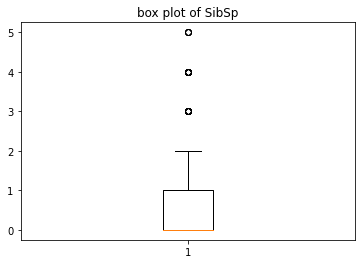

In [64]:
plt.boxplot(data['SibSp'])
plt.title('box plot of SibSp')

In [65]:
Q1 =np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 =np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 =np.percentile(data['SibSp'], 75, interpolation='midpoint')
IQR=Q3-Q1
IQR

1.0

In [66]:
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-1.5
2.5


In [67]:
outlier_2=data['SibSp']>upp_lim
index=data.loc[outlier_2].index

In [68]:
index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [69]:
data.drop([25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],inplace=True)

In [70]:
data.shape

(689, 8)

In [72]:
#the number of row drop 718 to 689

Linear Regression

In [74]:
y=data['Survived']
x=data.drop(['Survived'],axis=1)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [77]:
x_train.shape

(551, 7)

In [78]:
x_test.shape

(138, 7)

In [79]:
from sklearn import linear_model

In [80]:
Ir=linear_model.LinearRegression()
ajay=Ir.fit(x_train,y_train)


In [81]:
pred=ajay.predict(x_test)
pred

array([ 0.08950179,  0.67845601,  0.88532625,  0.59721109,  0.10537543,
        0.13046942,  0.13108411,  0.16625603,  0.63883242,  0.15009179,
        0.31659473,  0.19185723,  1.0580776 ,  0.11720283,  0.18241242,
        0.76638823,  0.21210094,  0.68873349,  0.4601881 ,  0.73414327,
        0.38273085,  0.54565688,  0.68076031,  0.63571872,  0.16987609,
        0.21114725,  0.2298765 ,  0.32668508,  0.84505212,  0.17268821,
        0.16607177,  0.77938431,  0.19185723,  0.70445804,  0.75666344,
        0.72824752,  0.57386953,  0.63769352,  0.7707409 ,  0.35452871,
        0.34433972,  0.66800979,  0.31741512,  0.10537543,  0.15180422,
        0.16963491,  0.64907682,  0.04077544,  0.08610175,  0.20749274,
        0.10012741,  0.10612842,  0.13762538, -0.23282408,  0.80080943,
        0.69588572,  0.43159453,  0.29383277,  0.1975168 ,  0.01354221,
        0.77237519,  0.10832635,  0.10209974,  0.03449871,  0.71552712,
        0.10537543,  0.52882394,  0.2579203 ,  0.84472185,  0.10

In [82]:
from sklearn.metrics import mean_squared_error

In [83]:
print('MSE is',mean_squared_error(y_test,pred))

MSE is 0.1404930255177418


In [84]:
from sklearn.metrics import r2_score

In [85]:
print('r2:',r2_score(y_test,pred))

r2: 0.3969913955465687


In [86]:
# r square value is 0.39 and mse is 0.140
#try to imporove our model in  fature scaling

# min max scaling

In [105]:
x=data.drop(['Survived'],axis=1)

In [106]:
from sklearn import preprocessing

In [107]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))


In [108]:
x=min_max.fit_transform(x)
#then we check x

In [109]:
x=pd.DataFrame(x)

In [110]:
x.describe()

,0,1,2,3,4,5,6
count,689.000000,689.000000,689.000000,689.00000,689.000000,689.000000,689.000000
mean,0.746734,0.312046,0.511781,0.13643,0.044993,0.270959,0.140784
std,0.361793,0.463665,0.187116,0.25051,0.125771,0.213306,0.348051
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.392157,0.00000,0.000000,0.127962,0.000000
50%,1.000000,0.000000,0.523512,0.00000,0.000000,0.171068,0.000000
75%,1.000000,1.000000,0.588235,0.00000,0.000000,0.382051,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [111]:
# mimumum is zero and maximum is one the table can be changed by applying model

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
Ir=linear_model.LinearRegression()
x=Ir.fit(x_train,y_train)
print('MSE is',mean_squared_error(y_test,pred))
print('r2:',r2_score(y_test,pred))

MSE is 0.1404930255177418
r2: 0.3969913955465687
